# Analyzing Ultimate Frisbee

### By Jackie Martinez, Ryan Kerr, Emily Houlihan, Karine Hsu

# Table of Contents

* [Data Parsing and Cleaning](#Data-Parsing-and-Cleaning)
* [Exploratory Analysis](#Exploratory-Analysis)
    * [Distribution of Time Elapsed per Point by Team](#Distribution-of-Time-Elapsed-per-Point-by-Team)
    * [Points Broken Per Team](#Points-Broken-Per-Team)
    * [Importance of the pull](#Importance-of-the-pull)
    * [Player Statistics](#Player-Statistics)
* [Player Clustering](#Player-Clustering)
    * [Calculating player statistics](#Calculating-player-statistics)
    * [4 cluster model](#4-cluster-model)
    * [5 cluster model](#5-cluster-model)
* [Point Clustering](#Point-Clustering)
* [Twitter Analysis](#Twitter-Analysis)
* [Conclusions](#Conclusions)

# Data Parsing and Cleaning

The American Ultimate Disc League (AUDL) is a professional ultimate frisbee league in North America. The data we worked with came from the 2015 AUDL Website http://theaudl.com/stats/allstandings, which consisted of 25 teams with around 800 players total, and data on a point-by-point basis for each game.

The data came in 25 separate CSV files for each team and the games they played. We first had to add a column with the team name and combine the files into one.

In [1]:
import numpy as np
import pandas as pd
import pdb
import csv
import glob
import re
pd.set_option('display.max_columns', None)

In [16]:
# script to add team name to respective team CSV
# this script goes through 25 CSVs for all 25 AUDL teams
for files in westfiles:
    with open(files, 'r') as finput:
        with open('Formatted'+files, 'w') as foutput:

            writer = csv.writer(foutput, lineterminator='\n')
            reader = csv.reader(finput)

            all = []
            row = next(reader)
            row.append('Team')
            all.append(row)


            for row in reader:
                row.append(re.split('2015',files)[0])
                all.append(row)

            writer.writerows(all)

In [17]:
# combine individual team CSV files into one large CSV
frame = pd.DataFrame()
list_ = []
for file_ in glob.glob("Formatted*.csv"):

    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
    frame = pd.concat(list_)
frame.to_csv('combined.csv', encoding='utf-8')


### Making dataframe for Twitter and AUDL player data

In [3]:
combined_dict = pd.read_csv("combined_dict.csv")

In [4]:
combined_dict.head(3)

,site_name,full_name
0,A Drews,Adam Drews
1,A Mesh,Andrew Meshnick
2,S Meyer,Seth Meyer


In [9]:
# script to write into dictionary
import csv
with open('combined_dict.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('combined_dict2.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        playerdict = {rows[0]:rows[1] for rows in reader}
        

# Exploratory Analysis

In our exploratory analysis, we aimed to answer a few questions about our favorite sport - ultime. Going through a game of ultimate, where the defensive team first pulls, then a point is played until 15 points or ends after a certain amount time, we aimed to figure out these questions: 

1. Does the length of time of a point tell us anything about the performance of a team? 
2. Does the percentage of points broken when on offense or defense tell us anything about a team?
3. Does the length of time of a pull (the throw that starts the point) matter? Is it good or bad to pull out of bounds?
4. What do statistics like, goals, assists, or throwaways, tell us about a player? 

### Looking at team data

In [4]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

combined = pd.read_csv('combined.csv')
goals_combined = combined[combined["Action"] == "Goal"]

In [4]:
goals_combined.head(5)

,Unnamed: 0,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,Receiver,Defender,Hang Time (secs),Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12,Player 13,Player 14,Player 15,Player 16,Player 17,Player 18,Player 19,Player 20,Player 21,Player 22,Player 23,Player 24,Player 25,Player 26,Player 27,Elapsed Time (secs),Team
5,5,2015-04-12 13:09,NaN,Charlotte Express,27,O,1,0,Offense,Goal,Dylan T,Matt S,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,AtlantaHustle
7,7,2015-04-12 13:09,NaN,Charlotte Express,9,D,1,1,Defense,Goal,NaN,NaN,Anonymous,NaN,TGoforth,R James,R Runner,S. Hicks,Archie,B. Liu,Jack K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,AtlantaHustle
19,19,2015-04-12 13:09,NaN,Charlotte Express,53,O,2,1,Offense,Goal,B Hannah,J Clark,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181,AtlantaHustle
28,28,2015-04-12 13:09,NaN,Charlotte Express,54,D,3,1,Offense,Goal,Breault,R James,NaN,NaN,R James,Breault,R Runner,S. Hicks,Archie,B. Liu,Jack K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,AtlantaHustle
31,31,2015-04-12 13:09,NaN,Charlotte Express,27,D,4,1,Offense,Goal,Matt K.,D Cox,NaN,NaN,TGoforth,Breault,R Runner,D Cox,RBradham,Archie,Matt K.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358,AtlantaHustle


## Distribution of Time Elapsed per Point by Team

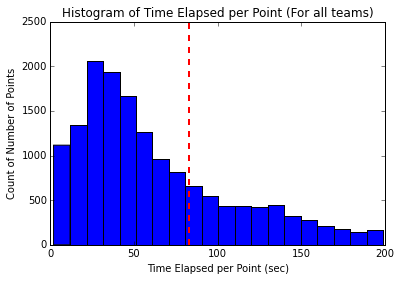

In [6]:
%matplotlib inline

#distribution of points 
point_combined = goals_combined['Point Elapsed Seconds'].values

plt.hist(point_combined[point_combined <200],bins=20)
plt.title('Histogram of Time Elapsed per Point (For all teams)')
plt.axvline(point_combined.mean(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Time Elapsed per Point (sec)')
plt.ylabel('Count of Number of Points')

This histogram shows the distribution of time elapsed per point. Before we look at distribution per team, we first wanted to look at the distribution of all teams. This histogram shows us that the most common length of time for a point is 35 seconds, whereas the mean is 83 seconds. The distribution is as we expected -  the distribution to be right skewed because there are more short points than long points.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

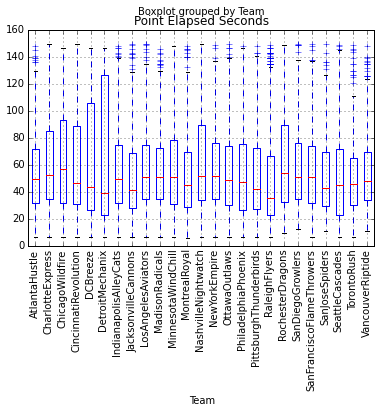

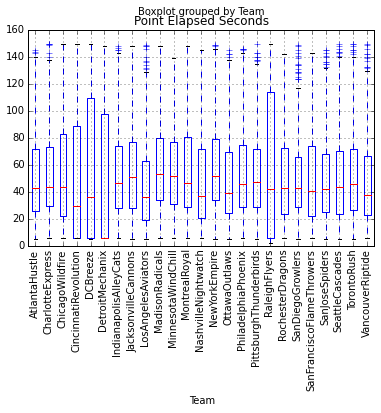

In [15]:
filtered = goals_combined[goals_combined['Point Elapsed Seconds']<=150]
filteredo = filtered[filtered['Line'] == 'O']
filteredd = filtered[filtered['Line'] == 'D']

filteredo.boxplot('Point Elapsed Seconds', 'Team')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

filteredd.boxplot('Point Elapsed Seconds', 'Team')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


The first boxplot grouped by team when on offense or defense shows that the best teams have short offensive and defensive points. For example, the San Jose Spiders have a mean of about 40 seconds per point. However, another good team, the Raleigh Flyers are probably a better offensive team because they have shorter offensive points, but long defensive points. From this, we can also see that the Detroit Mechanix, a team that is not that great, had both long defensive and offensive points.

## Points Broken Per Team

In ultimate, we use a term called 'broken' to represent when a team starts on either offense or defense and then switches to defense or offense respectively. 

In [2]:
# break_array are the percentage of points broken starting on defense
# broken_array are the percentage of points broken starting on offense
teams = np.unique(goals_combined['Team'])
break_array = []
broken_array = []
for teamname in teams[1:25]:
    team = goals_combined[goals_combined['Team'] == teamname]
    o_line = team[team["Line"] == "O"]
    broken = o_line["Event Type"][o_line["Event Type"] == "Defense"]
    d_line = team[team["Line"] == "D"]
    breaks = d_line["Event Type"][d_line["Event Type"] == "Offense"]
    broken_array.append(broken.shape[0] / float(o_line.shape[0]))
    break_array.append(breaks.shape[0] / float(d_line.shape[0]))

#creating a dictionary with team names and break percentages
break_dict = dict(zip(teams[1:25],break_array))
broken_dict = dict(zip(teams[1:25],broken_array))

NameError: name 'goals_combined' is not defined

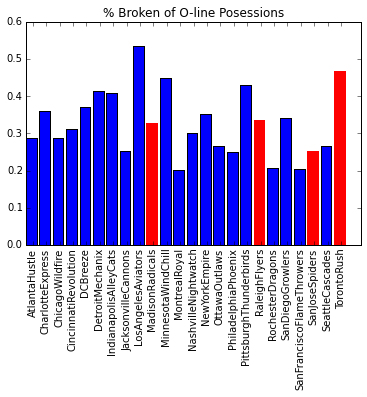

In [37]:
%matplotlib inline
h = plt.bar(xrange(len(teams[1:25])), broken_dict.values())
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,teams[1:25])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#denote regional winners San Jose Spiders, Toronto Rush, Madison Radicals, and Raleigh Flyers
h[21].set_color('r')
h[23].set_color('r')
h[9].set_color('r')
h[17].set_color('r')
plt.title('% Broken of O-line Posessions')

The red bars denote the regional winners. Interestingly, the San Jose Spiders, the 2015 AUDL winner were broken on about 25% of their O line posessions. We would have expected much lower. Even the regional winners seemed to have variable percent broken on O-line possessions. 

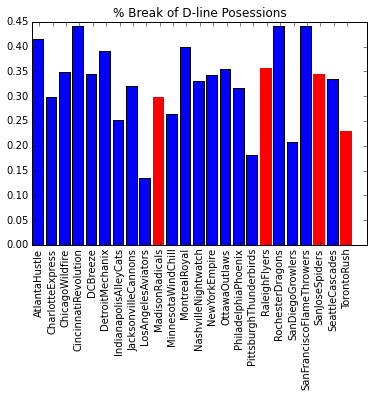

In [19]:
h = plt.bar(xrange(len(teams[1:25])), break_dict.values())
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,teams[1:25])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#denote regional winners San Jose Spiders, Toronto Rush, Madison Radicals, and Raleigh Flyers
h[21].set_color('r')
h[23].set_color('r')
h[9].set_color('r')
h[17].set_color('r')
plt.title('% Break of D-line Posessions')


Again, the red bars denote the regional winners. Interestingly, the San Jose Spiders, the 2015 AUDL winner were broken on about 31% of their D-line posessions, and also had ~40 more D points than O points. This seems like a pretty good precentage to me. It seems that the teams with relatively high percentages of Broken D-Line possessions are better teams. This makes sense because teams want to score on offense.

## Importance of the pull

In order to determine the importance of a pull, we created a data frame with stats for each point and whether or not the point was won. 

In [6]:
actions = set(combined["Action"])
print "These are the possible actions that can occur ", actions
# get the actions that can start a point, cause a turn, or end a point.
actions_start = ["Pull", "PullOb", "OpponentPull", "OpponentPullOb"]
actions_turn = ["Stall", "Throwaway", "D", "Drop"]
actions_end = ["EndOfThirdQuarter", 'EndOfFirstQuarter', "Goal", "GameOver",
               "HalfTime", "Callahan", "EndOfFourthQuarter", "End of Overtime"]

These are the possible actions that can occur  set(['EndOfThirdQuarter', 'Pull', 'EndOfFirstQuarter', 'PullOb', 'Goal', 'GameOver', 'OpponentCatch', 'Drop', 'OpponentPull', 'OpponentPullOb', 'Halftime', 'Stall', 'MiscPenalty', 'Callahan', 'Catch', 'EndOfFourthQuarter', 'Throwaway', 'EndOfOvertime', 'D'])


In [7]:
# beginning df structure
cols = {"team": [], "offense": [], "turns" : [], "pull": [], "pull-ob": [], "ds":[], "won": [], "pull_time" : [], "point_time": [], "num_throws":[]}

# names of columns in df made easier.
ours = "Our Score - End of Point"
theirs = "Their Score - End of Point"

# for each throw, determine if it's the end of a point, or a turn, and update accordingly
def parse_throw(row):
    if parse_throw.newpt:
        cols["team"] += [row.Team]
        cols["offense"].append(row.Line == 'O')
        cols["turns"] += [0]
        cols["ds"] += [0]
        cols['pull'].append(row.Action == "Pull")
        cols["pull-ob"].append(row.Action == "PullOb" or row.Action == "OpponentPullOb")
        cols['pull_time'] += [row['Hang Time (secs)']]
        cols["point_time"] += [row["Point Elapsed Seconds"]]
        cols["num_throws"] += [0]
        parse_throw.index += 1
        if parse_throw.prev == row[ours] - 1:
            cols["won"] += [True]
        elif parse_throw.prev_opp == row[theirs] - 1:
            cols["won"] += [False]
        else:
            cols["won"] += [row[ours] == 1]
    if row.Action in actions_turn:
        cols["turns"][parse_throw.index-1] += 1
    if row.Action == "D":
        cols["ds"][parse_throw.index-1] += 1
    cols["num_throws"][parse_throw.index-1] += 1
    parse_throw.newpt = (row.Action in actions_end)
    parse_throw.prev = row[ours]
    parse_throw.prev_opp = row[theirs]
# set default values for some fuction params
parse_throw.index = 0
parse_throw.num_throws = 0
parse_throw.prev = None
parse_throw.prev_opp = None
parse_throw.newpt = True

# apply and create our new df.
combined.apply(lambda x: parse_throw(x), axis=1)
points = pd.DataFrame(cols)

In [8]:
points.head(10)

,ds,num_throws,offense,point_time,pull,pull-ob,pull_time,team,turns,won
0,0,6,True,27,False,False,NaN,AtlantaHustle,0,True
1,0,2,False,9,True,False,6.206,AtlantaHustle,0,False
2,0,12,True,53,False,False,NaN,AtlantaHustle,0,True
3,0,9,False,54,True,False,5.172,AtlantaHustle,1,True
4,0,3,False,27,True,False,7.285,AtlantaHustle,1,True
5,0,2,False,61,True,False,6.779,AtlantaHustle,0,False
6,0,4,True,44,False,False,NaN,AtlantaHustle,1,False
7,2,12,True,121,False,False,NaN,AtlantaHustle,5,False
8,0,8,True,92,False,False,NaN,AtlantaHustle,2,True
9,0,5,False,62,True,False,6.575,AtlantaHustle,1,True


### Logistic Regression

Let's go ahead and run logistic regression on the entire data set to see if there is a correlation between pull time  and if the point is won or not, and see how accurate it is!

In [13]:
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
pulltime = points['pull_time'][pd.notnull(points['pull_time'])]
pulltime = np.ravel(pulltime)
won = points['won'][pd.notnull(points['pull_time'])]
won = np.ravel(won)

pulltime_array = []
for i in pulltime:
    pulltime_array.append([pulltime[i]])

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


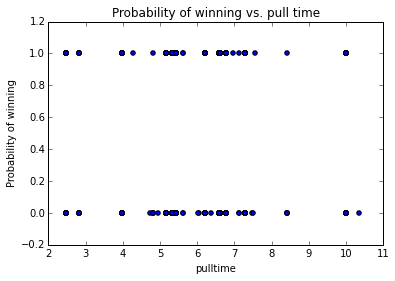

In [13]:
plt.scatter(pulltime_array,won)
plt.xlabel('pulltime')
plt.ylabel('Probability of winning')
plt.title('Probability of winning vs. pull time')

In [14]:
pull_time = points['pull_time'].values
boolean_array = [] 
for i in points['pull'][pd.notnull(pull_time)].values:
    boolean_array.append(int(i == True))


In [15]:
from pydoc import help 
from scipy.stats.stats import pearsonr

pearsonr(pull_time[pd.notnull(pull_time)],boolean_array)


(-0.0073960143510119992, 0.5388107871796759)

The p-value is .53, which shows that hang time of a pull and winning the point are not correlated.

In [134]:
logreg = LogisticRegression()
logreg.fit(pulltime_array, won)
logreg.score(pulltime_array, won)

0.69093804284887084

69% accuracy seems good, but what's the null error rate?

In [136]:
won.mean()

0.30906195715112911

Only 31% of the pulls were points that were won, which means that you could obtain 69% accuracy by always predicting "lost" for the point. So we're doing about the same as the null error rate, which isn't great.

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

#evaluate the model by splitting into test and training set

X_train, X_test, y_train, y_test = train_test_split(pulltime_array, won, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(pulltime_array, won)

0.69093804284887084

In [142]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print probs

[[ 0.69071978  0.30928022]
 [ 0.69242827  0.30757173]
 [ 0.69012965  0.30987035]
 ..., 
 [ 0.69007221  0.30992779]
 [ 0.69080835  0.30919165]
 [ 0.68939766  0.31060234]]


Now let's generate some evaluation metrics.

In [143]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.691268692716
0.498639763608


The accuracy is about 69%, which is the same as we experienced when training and predicting on the same data.

## Model Evaluation Using Cross-Validation

In [152]:
scores = cross_val_score(LogisticRegression(), pulltime_array, won, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.69075145  0.69075145  0.69075145  0.69030391  0.69030391  0.69130435
  0.69130435  0.69130435  0.69130435  0.69130435]
0.690938388915


To see if accuracy holds up more rigorously, we used cross-validation. Looks good - it's still performing at 69% accuracy.

## Predicting the Probability of Winning the Point

Just for fun, let's predict the probability of winning the point given a 5 second pull time and a 35 second pull time. 

In [151]:
model.predict_proba(np.array([5])), model.predict_proba(np.array([35]))

(array([[ 0.68991247,  0.31008753]]), array([[ 0.70482579,  0.29517421]]))

The predicted probability of winning a point is 31% and 30%, which are not very different. This shows that pull time does not seem to correlate with winning the point.

# Player Clustering

Is it possible to separate AUDL players into groups based on their role and playstyle?

Only 6 of the 24 AUDL teams have rosters with player positions specified, and some teams have different position names than others. These teams may be useful later, but it looks like we do not have suffieicnt information to do traditional classification. Instead we will have to take a clustering/unsupervised learning approach to identify different groups of players.

From the outset, we suspect that AUDL teams follow traditional ultimate schemes where players are split into offense/defense and handlers/cutters. This is the perfect appication for unsupervised clustering, as we expect that these groups exist but we do not have data for all players for it.

First we will load some necessary libraries and define some helper functions.

In [16]:
import scipy as sc
import matplotlib.pyplot as plt
import pdb

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.cluster import KMeans
from sklearn import datasets

from scipy.spatial.distance import cdist, euclidean
from scipy.stats import percentileofscore

pd.set_option('display.max_columns', None)

In [17]:
def clean_df(df):
    """Removes rows with improperly formatted data
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas df"""
    
    df = df[pd.isnull(df["Player 2"]) == False]
    return df[pd.isnull(df["Player 1"]) == False]


In [18]:
def get_players(df):
    """returns list of all players present in throw-by throw pandas dataframe"""
    players = pd.unique(df.loc[0:, "Player 0": "Player 27"].values.ravel())
    return [player for player in players if not pd.isnull(player)]

In [19]:
def summarize_points(df):
    """Gives point-by-point summaries
    
    df: pandas dataframe throw-by-throw data
    
    returns: pandas dataframe"""
    
    return df.groupby(["Date/Time", "Our Score - End of Point", "Their Score - End of Point"]).last().reset_index() 


## Calculating Player Summaries
The code below is used to get summary statistics for each player

In [20]:
def player_summaries(df):
    """Summarize statistics for all players
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas dataframe"""
    
     # does not mutate the original
    df = clean_df(df)
    
    players = get_players(df)
    stats = {"team"      : "",
             "goals"     : 0,
             "assists"   : 0,
             "ds"        : 0,
             "throwaways": 0,
             "drops"     : 0,
             "opoints"   : 0,
             "dpoints"   : 0}
    team_stats = {player: dict(stats) for player in players}
    
    # to keep track of the column number
    cols = list(df.columns)
    passer   = cols.index("Passer")
    receiver = cols.index("Receiver")
    p0       = cols.index("Player 0")
    p27      = cols.index("Player 27")
    line     = cols.index("Line")
    
    
    # add goals and assists
    ogoals = df[(df.Action == "Goal") & (df["Event Type"] == "Offense")]
    for row in ogoals.values:
        # we have try/execpt here for unpredictable data impurities
        # eg: "Anonymous" for one of the assists, stat-keeper must
        # have not known who threw it (?) callahan?
        try: team_stats[row[passer]]["assists"] += 1
        except: pass
        try: team_stats[row[receiver]]["goals"]  += 1
        except: pass
        
    # add D's
    ds = df.Defender[df.Action == "D"]
    for player in ds:
        try: team_stats[player]["ds"] += 1
        except: pass
        
        
    # add turnovers and drops
    turns = df[((df.Action == "Throwaway") & (df["Event Type"] == "Offense")) | (df.Action == "Drop") ]
    for row in turns.values:
        if row[8] == "Throwaway":
            try: team_stats[row[passer]]["throwaways"] += 1
            except: pass
        else:
            try: team_stats[row[receiver]]["drops"]     += 1
            except: pass
    
    # add points
    point_summaries = summarize_points(df)
    line = list(point_summaries.columns).index("Line")
    for row in point_summaries.values:
        player_cols = row[p0:p27]
        players = [player for player in player_cols if not pd.isnull(player)]
        if row[line] == "O":
            for player in players:
                team_stats[player]["opoints"] += 1
        else:
            for player in players:
                team_stats[player]["dpoints"] += 1
                
    summary = pd.DataFrame.from_dict(team_stats, orient="index").sort_values("goals", ascending=False)
    summary = summary[["team", "goals", "assists", "ds", "throwaways", "drops", "opoints", "dpoints"]]
    summary["totalpoints"] = summary["opoints"] + summary["dpoints"]
    summary["pct_opoints"] = summary["opoints"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_goal"]    = summary["goals"]   / [float(x) for x in summary["totalpoints"]]
    summary["pct_assist"]  = summary["assists"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_d"]       = summary["ds"]      / [float(x) for x in summary["totalpoints"]]
    
    return summary

## Creating a K-means model for all players

In [21]:
combined = pd.read_csv("combined.csv")
combined = clean_df(combined)
combined = combined.drop("Unnamed: 0", axis=1)

In [22]:
all_players = player_summaries(combined)
all_players["goal_percentile"] = [percentileofscore(all_players["pct_goal"], x) / 100.0 for x in all_players["pct_goal"]]
all_players["assist_percentile"] = [percentileofscore(all_players["pct_assist"], x) / 100.0 for x in all_players["pct_assist"]]
cluster_cols = all_players[["pct_opoints", "goal_percentile", "assist_percentile"]]

After reading in the data we'll use k-means to create player clusters. These clusters will be based off of the player's statistics and will hopefully be able to identify different playstyles. We will first explore using the elbow method to see if there is an optimal number of clusters.

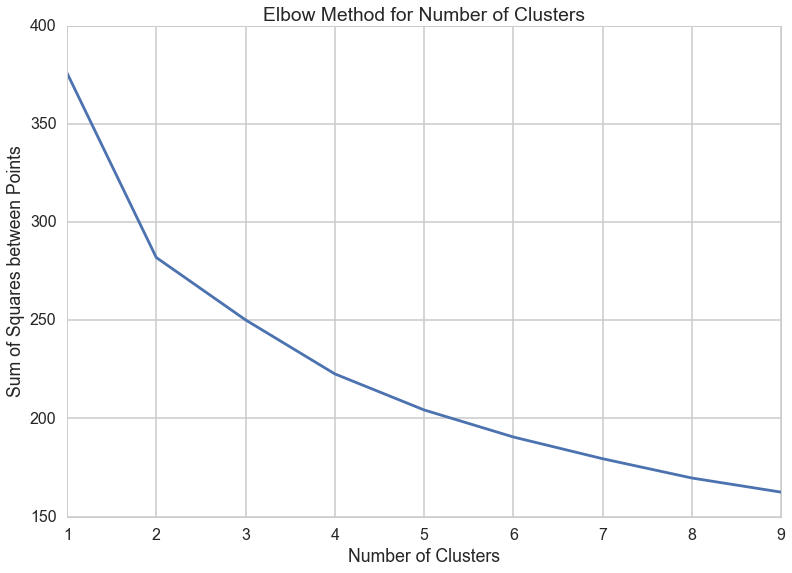

In [65]:
num_clusters = range(1, 10)
models = [KMeans(n_clusters = x) for x in num_clusters]

# get score from the 
def score_from_model(model):
    predicted = model.fit_predict(cluster_cols.values)
    centroids = [model.cluster_centers_[x] for x in predicted]
    dist_sum = 0
    for i in range(0, len(predicted)):
        dist_sum += euclidean(cluster_cols.values[i], centroids[i])
    return dist_sum
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)
plt.title("Elbow Method for Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares between Points")

There doesn't seem to be an obvious "elbow" for us to separate clusters into. Perhaps we could say that the elbow is at 2, but that would most likely just be splitting players into clusters by offense/defense. We know we want at least four (offensive handler, offensive cutter, defensive handler, defensive cutter), so that should be a lower bound. Let's take a look at what the clusters end up being for a few cases.

## 4 cluster model

We will first look at a 4-cluster model because that is the minumum number of clusters we could have (explained above).

In [25]:
model = KMeans(n_clusters=4).fit(cluster_cols.values)
all_players["cluster"] = model.labels_
all_players.groupby("cluster").count().iloc[0:, 0]

cluster
0    221
1    146
2    194
3    216
Name: team, dtype: int64

In [29]:
all_players.groupby("cluster").mean()[["pct_opoints", "pct_goal", "pct_assist"]]

,pct_opoints,pct_goal,pct_assist
cluster,,,
0,0.196020,0.021424,0.027139
1,0.674303,0.029770,0.083381
2,0.754226,0.115208,0.098855
3,0.246165,0.082355,0.042592


## 5 cluster model

In [30]:
model = KMeans(n_clusters=5).fit(cluster_cols.values)
all_players["cluster"] = model.labels_
all_players.groupby("cluster").count().iloc[0:, 0]

cluster
0    185
1    171
2    135
3    181
4    105
Name: team, dtype: int64

In [32]:
all_players.groupby("cluster").mean()[["pct_opoints", "pct_goal", "pct_assist"]]

,pct_opoints,pct_goal,pct_assist
cluster,,,
0,0.760513,0.114519,0.101688
1,0.276601,0.090362,0.029608
2,0.257604,0.042038,0.081091
3,0.196407,0.020835,0.020088
4,0.789905,0.029867,0.077056


As we can see from the two summaries above, there are clear offensive handlers and cutters from both models (hight % opoints, cutters have high assist and goal percentages, handlers have high assist percentage). However, the breakdown seems to be not as clear for defensive players. In the 4-cluster model, there are clear defensive cutters, but the 4th cluster seems to be role-players (they do not have high assist % or goal %). The 5-cluster model creates 3 defensive player groups, one with role players, one with handlers, and one with cutters. We will go with this 5-cluster group for our model.

### Evaluating Cluster/Position Differences
We want to now look at how the k-means clustering worked out. To do this we will look at the differences in summary statistics within these position clusters

In [35]:
# defining clusters in plaintext

# this code is for the first time we run our code
# all_players.cluster[all_players.cluster == 3] = "d_handler"
# all_players.cluster[all_players.cluster == 2] = "d_roleplayer"
# all_players.cluster[all_players.cluster == 1] = "o_cutter"
# all_players.cluster[all_players.cluster == 0] = "d_cutter"
# all_players.cluster[all_players.cluster == 4] = "o_handler"

# reload ou past work
all_players = pd.DataFrame.from_csv("all_players.csv")

In [36]:
blues = sns.color_palette("Blues")
reds  = sns.color_palette("Reds")
position_colors = {"o_cutter" : blues[4],
                   "o_handler" : blues [2],
                   "d_cutter" : reds[4],
                   "d_handler" : reds[2],
                   "d_roleplayer": reds[0]}
position_order = ["d_roleplayer",
                  "d_handler",
                  "d_cutter",
                  "o_handler",
                  "o_cutter"]

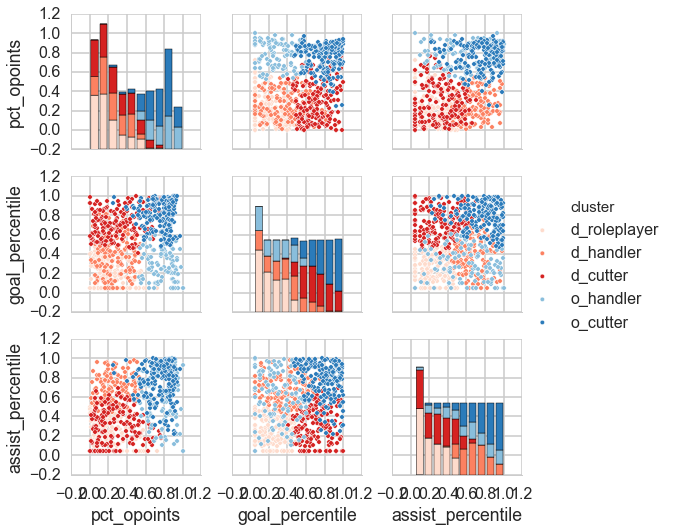

In [38]:
sns.pairplot(all_players, vars=["pct_opoints", "goal_percentile", "assist_percentile"],
             hue="cluster", hue_order=position_order, palette=position_colors)

Investigating our clusters above we can see a few things. One of the first is that our suspicion about offensive/defensive players: we can see that the histogram for percentage of offensive points played is bimodal, with players tending to play their points on one particular side of the disc. We can also see the large group of defensive role players in the bottom corner of the plot. While it is unfortunate for classification that we cannot really tell if these players are handlers of cutters, it is necessary to do a 5-cluster model so that we have some method of identifying defensive handlers.

We also observe a very uniform distribution for the assist and goal percentiles - this is to be expected due to the nature of the fact that we trandformed the data into a percentile scale. Let's examine the data without the transformation.

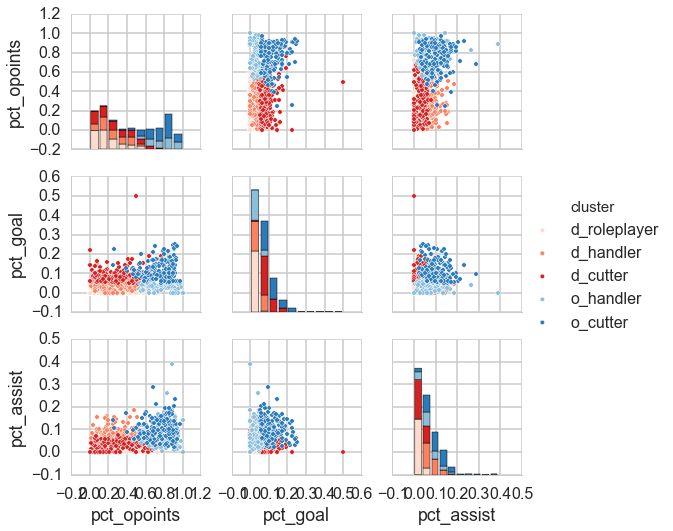

In [39]:
sns.pairplot(all_players, vars=["pct_opoints", "pct_goal", "pct_assist"],
             hue="cluster", hue_order=position_order, palette=position_colors)

It is interesting to note that all of these data are very right-skewed. The majority of players have very low goal and assist percentages. This shows that the best players are racking up most of the goals and assists.

Another interesting observation lies within our "offensive cutter" cluster. This cluster not only has a high percentage of goals, but also a high percentage of assists. This goes to show that the best players at the profssional level are skilled on both sides of the disc. We can look at some of the best offensive cutters to see that they are both goal scoring and assist making machines.


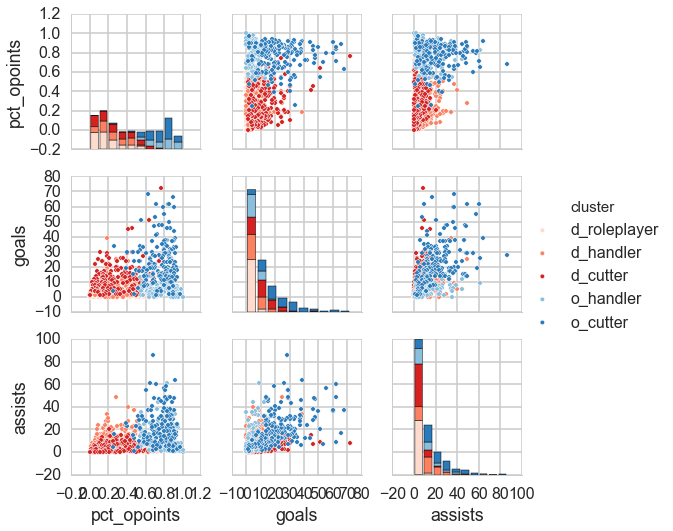

In [40]:
sns.pairplot(all_players, vars=["pct_opoints", "goals", "assists"],
             hue="cluster", hue_order=position_order, palette=position_colors)

This gives us a very similar plot to the on above - very right skewed data.

One of the most surprising things we have observed is that offensive cutters are also very good at assisting. Below we look at some of the best known offensive cutters: Beau Kittredge, Justin Allen, and Tyler Degirolimo.

In [41]:
# top offensive cutters also tend to be great throwers
all_players.loc[["Kittre B", "Allen J", "DeGiro T"], ["goals", "assists", "cluster"] ]

,goals,assists,cluster
Kittre B,68,37,o_cutter
Allen J,62,60,o_cutter
DeGiro T,28,86,o_cutter


As we can see here, these great cutters also rack up lots of assists. Even in cases where a player has more assists than goals (as is the case with Tyler Degirolamo), the clustering alysis still accurately classifies him as a cutter.

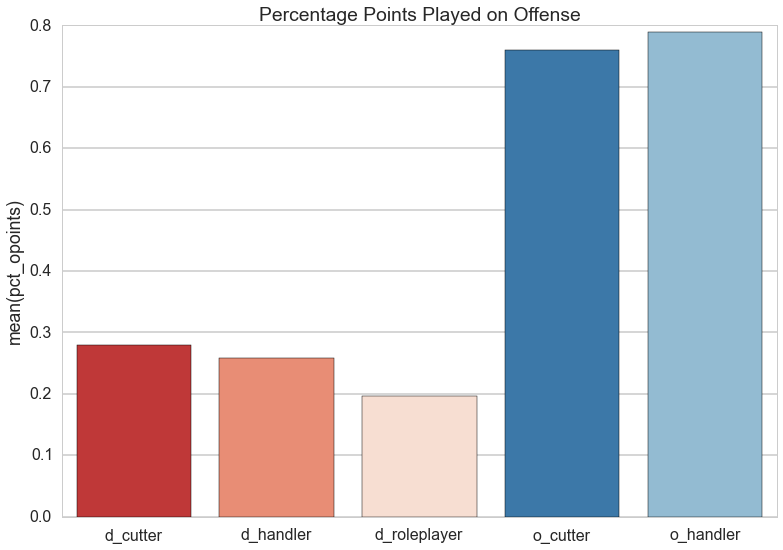

In [43]:
cluster_summary = all_players.groupby("cluster").mean()
ax = plt.gca()
sns.barplot(list(cluster_summary.index), cluster_summary.pct_opoints,
            palette=position_colors, ax=ax)
ax.set_title("Percentage Points Played on Offense")

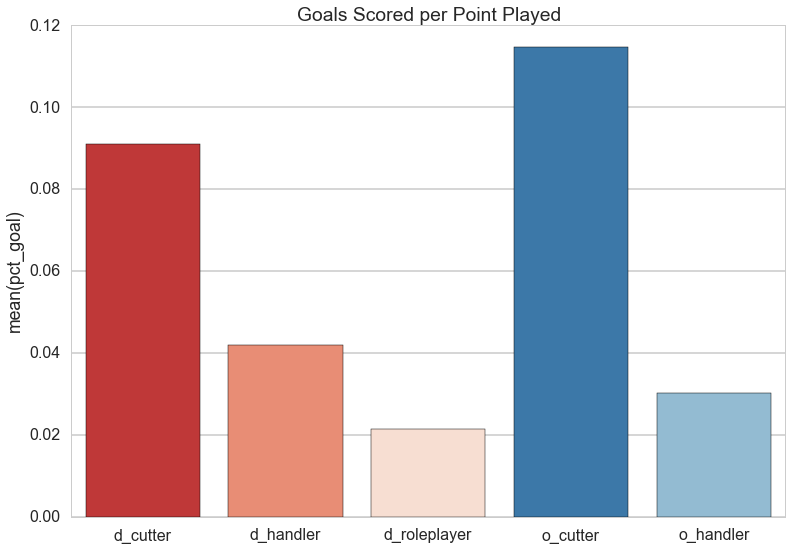

In [45]:
ax = plt.gca()
sns.barplot(list(cluster_summary.index), cluster_summary.pct_goal,
            palette=position_colors, ax=ax)
ax.set_title("Goals Scored per Point Played")

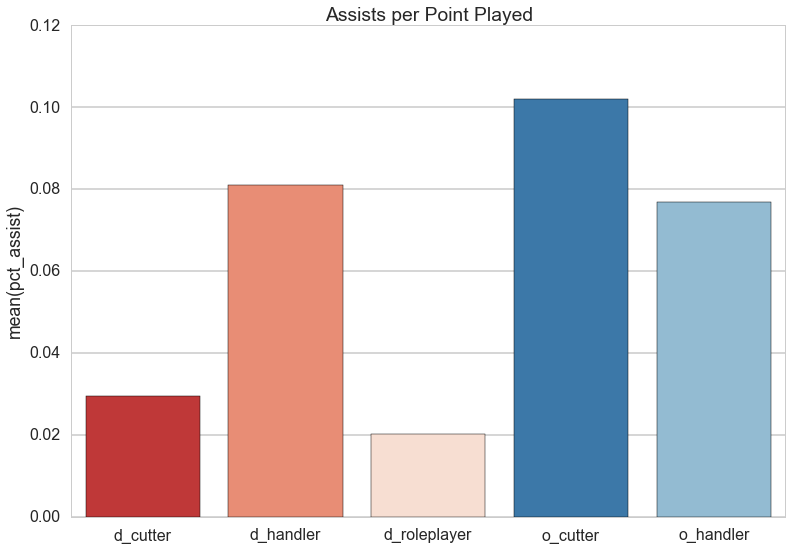

In [46]:
ax = plt.gca()
sns.barplot(list(cluster_summary.index), cluster_summary.pct_assist,
            palette=position_colors, ax=ax)
ax.set_title("Assists per Point Played")

As we can see from the plots above, offensive players, of course, play most of their points starting on offense. Handlers tend to assist more than they score, and cutters tend to score more than they assist. The one caveat is offensive cutters, who seem to be profficient in both scoring goals and getting assists.

#### Offense / Defense

In [44]:
o_cutters = all_players[all_players.cluster == "o_cutter"]
o_handlers = all_players[all_players.cluster == "o_handler"]
d_cutters = all_players[all_players.cluster == "d_cutter"]
d_handlers = all_players[all_players.cluster == "d_handler"]
d_roleplayers = all_players[all_players.cluster == "d_roleplayer"]
offense = pd.concat([o_cutters, o_handlers])
defense = pd.concat([d_cutters, d_handlers, d_roleplayers])
cutters = pd.concat([o_cutters, d_cutters])
handlers = pd.concat([o_handlers, d_handlers])

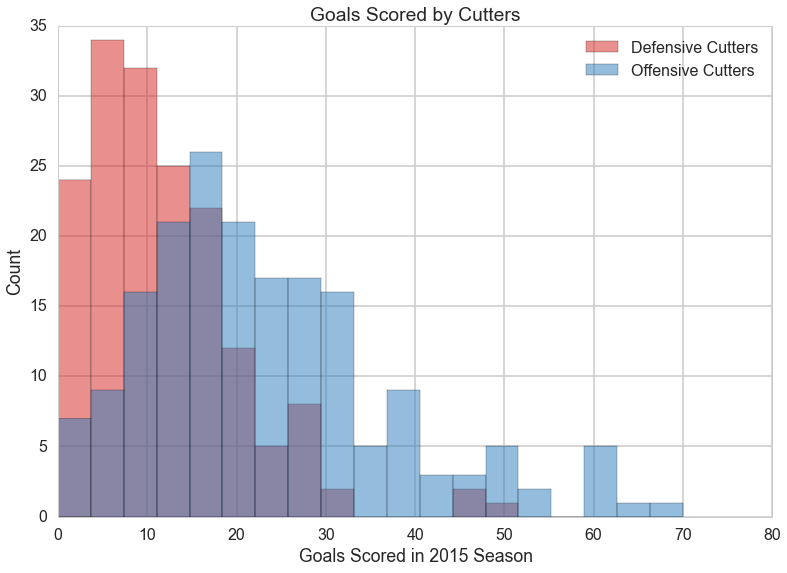

In [47]:
bins = np.linspace(0, 70, 20)

plt.hist(d_cutters["goals"], bins, alpha=.5, 
         color=position_colors["d_cutter"],
         label="Defensive Cutters")
plt.hist(o_cutters["goals"], bins, alpha=.5,
         color=position_colors["o_cutter"],
         label="Offensive Cutters")
plt.title("Goals Scored by Cutters")
plt.ylabel("Count")
plt.xlabel("Goals Scored in 2015 Season")
plt.legend(loc="upper right")

We can see above that the total number of goals scored has a different distribution between the two groups. This is probably because offensive cutters get more chances to score, as they start with the disc more often. Also, teams' best players often tend to be offensive cutters, so we would expect those great players to score more goals throughout the season.

In [48]:
sc.stats.ttest_ind(o_cutters.goals, d_cutters.goals, equal_var=False)

Ttest_indResult(statistic=8.7876136803348821, pvalue=8.4626037798190019e-17)

Running a t-test on these groups shows that there is a statistically significant difference in number of goals scores between offensive and defensive cutters

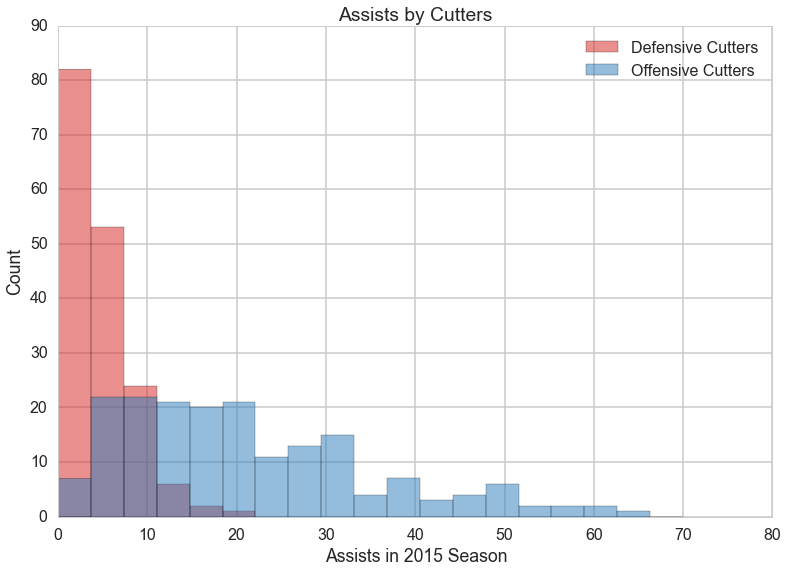

In [49]:
bins = np.linspace(0, 70, 20)

plt.hist(d_cutters["assists"], bins, alpha=.5, 
         color=position_colors["d_cutter"],
         label="Defensive Cutters")
plt.hist(o_cutters["assists"], bins, alpha=.5,
         color=position_colors["o_cutter"],
         label="Offensive Cutters")
plt.title("Assists by Cutters")
plt.ylabel("Count")
plt.xlabel("Assists in 2015 Season")
plt.legend(loc="upper right")

As we can see here, offensive cutters tend to assist much more than dfnsive cutters. Players that can both score and assist are extremely valuable so teams play them on the offensive line.

In [50]:
sc.stats.ttest_ind(o_cutters.assists, d_cutters.assists, equal_var=False)

Ttest_indResult(statistic=14.886003043761511, pvalue=1.0830248451523898e-34)

Performing a t-test here also shows that there is a staitstically significant difference in mean assist between offensive and defensive cutters.

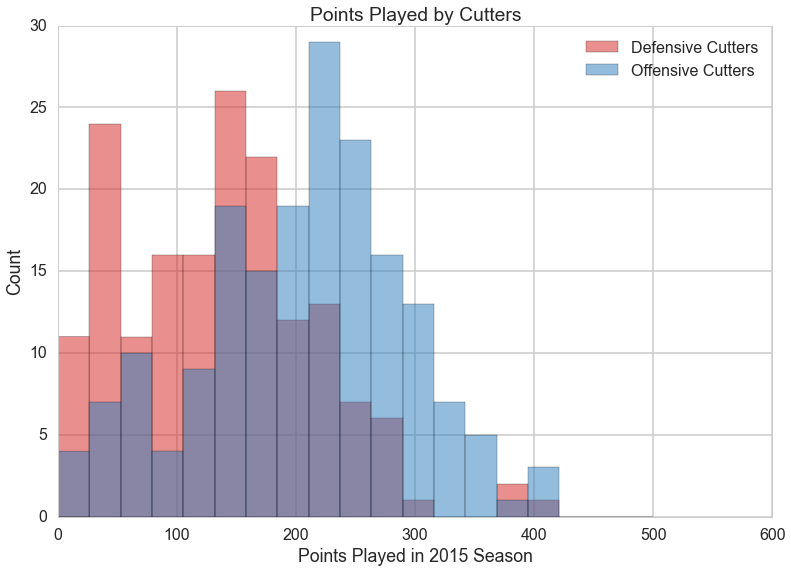

In [51]:
bins = np.linspace(0, 500, 20)

plt.hist(d_cutters["totalpoints"], bins, alpha=.5, 
         color=position_colors["d_cutter"],
         label="Defensive Cutters")
plt.hist(o_cutters["totalpoints"], bins, alpha=.5,
         color=position_colors["o_cutter"],
         label="Offensive Cutters")
plt.title("Points Played by Cutters")
plt.ylabel("Count")
plt.xlabel("Points Played in 2015 Season")
plt.legend(loc="upper right")

We can also see here that offensive cutters played more total points throughout the season than defensive players. This confirms our suspision that offensive cutters tend to be better players - as we know that teams want to play their better players as much as possible. 

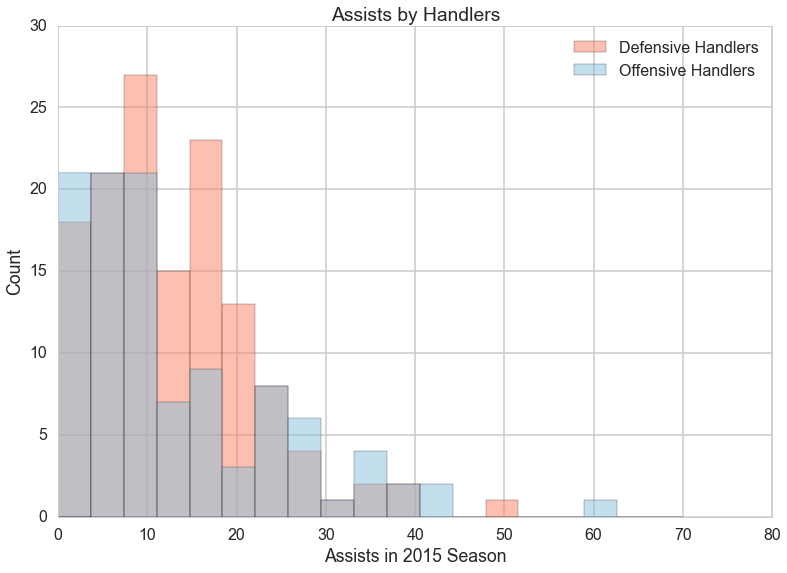

In [52]:
bins = np.linspace(0, 70, 20)

plt.hist(d_handlers["assists"], bins, alpha=.5,
         color=position_colors["d_handler"],
         label="Defensive Handlers")
plt.hist(o_handlers["assists"], bins, alpha=.5,
         color=position_colors["o_handler"],
         label="Offensive Handlers")
plt.title("Assists by Handlers")
plt.ylabel("Count")
plt.xlabel("Assists in 2015 Season")
plt.legend(loc="upper right")

This graph is interesting bcause it appears that offensive and defensive handlers get about the same number of assists. We would normally expect offensive handlers to score more because they get more points on offense, but perhaps they do not score as much because offesive cutters do lots of the assisting on offense.

In [53]:
sc.stats.ttest_ind(o_handlers.assists, d_handlers.assists, equal_var=False)

Ttest_indResult(statistic=0.049549272467241834, pvalue=0.96053432860764976)

This t-test confirms what we see in the histogram above, that the difference in number of assists is about the same for both offensive and defensive handlers.

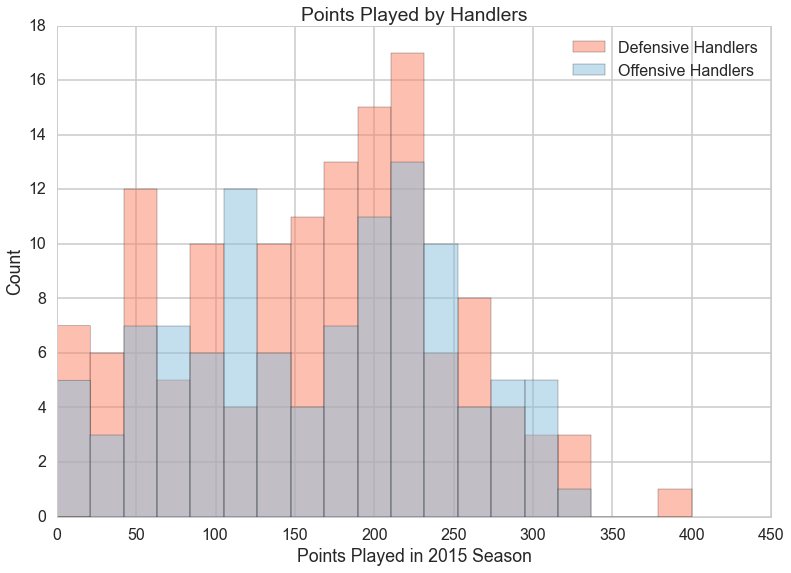

In [54]:
bins = np.linspace(0, 400, 20)

plt.hist(d_handlers["totalpoints"], bins, alpha=.5,
         color=position_colors["d_handler"],
         label="Defensive Handlers")
plt.hist(o_handlers["totalpoints"], bins, alpha=.5,
         color=position_colors["o_handler"],
         label="Offensive Handlers")
plt.title("Points Played by Handlers")
plt.ylabel("Count")
plt.xlabel("Points Played in 2015 Season")
plt.legend(loc="upper right")

Again, we see that the difference between offensive and defensive handlers is really only captured by the proportion of points played on offense. Here we can see that both groups play about the same number of points per game. This is very different from the offensive and defensiv cutters, where offensive cutters seemed to get much more playing time.

In [55]:
sc.stats.ttest_ind(o_handlers.totalpoints, d_handlers.totalpoints, equal_var=False)

Ttest_indResult(statistic=0.28080845722078807, pvalue=0.77911177760485173)

Here we show that the difference in mean number of points played is not statistically significant between these groups.

#### Do handlers get more D's than offensive players?

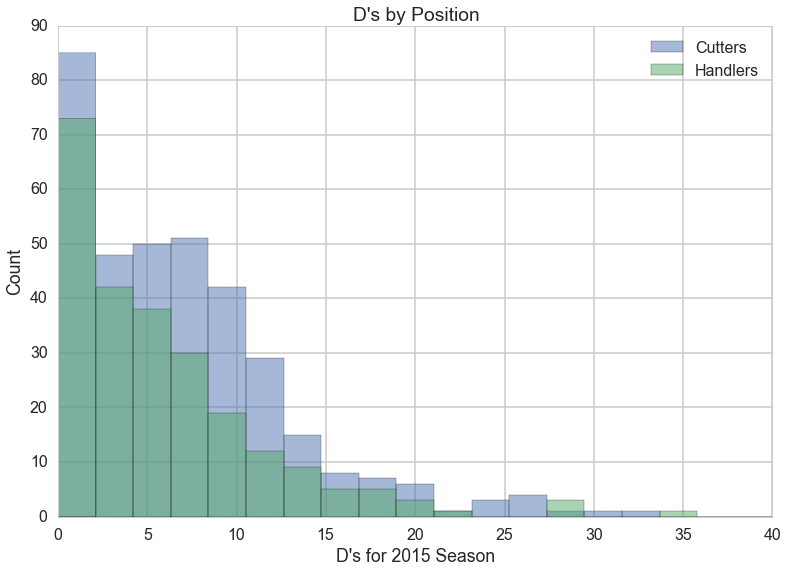

In [57]:
bins = np.linspace(0, 40, 20)


plt.hist(cutters["ds"], bins, alpha=.5,
         label="Cutters")
plt.hist(handlers["ds"], bins, alpha=.5,
         label="Handlers")
plt.title("D's by Position")
plt.ylabel("Count")
plt.xlabel("D's for 2015 Season")
plt.legend(loc="upper right")

These distributions seem to be very similar. While there may be a difference in mean number of D's it looks like neither position is wildly better for getting Ds.

In [60]:
sc.stats.ttest_ind(cutters.ds, handlers.ds, equal_var=False)

Ttest_indResult(statistic=2.1676540984202095, pvalue=0.030629292664566255)

This t-test shows that there is a statistically significant difference in the number of Ds between cutters and handlers. Cutters tend to have slightly more Ds than handlers.

#### Do Handlers or Cutters turn it over more?


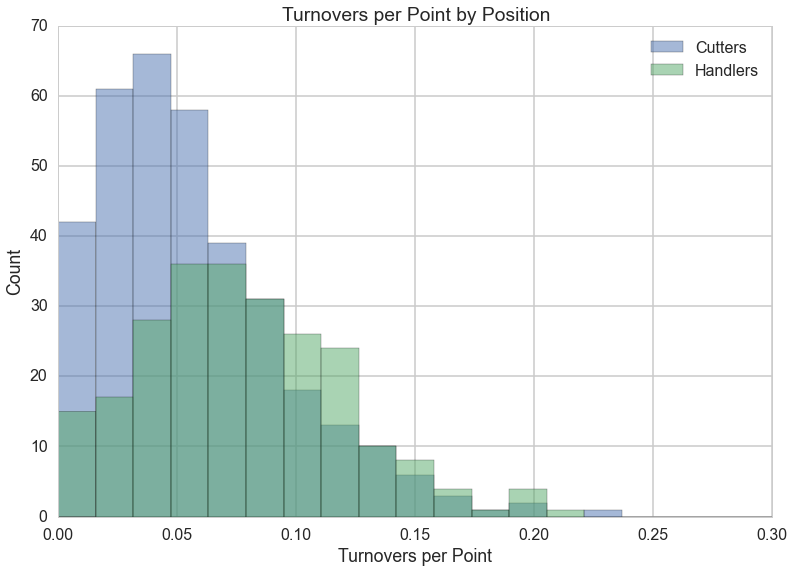

In [63]:
bins = np.linspace(0, .3, 20)

plt.hist(cutters["throwaways"]/cutters["totalpoints"], bins, alpha=.5,
         label="Cutters")
plt.hist(handlers["throwaways"]/handlers["totalpoints"], bins, alpha=.5,
         label="Handlers")
plt.title("Turnovers per Point by Position")
plt.ylabel("Count")
plt.xlabel("Turnovers per Point")
plt.legend(loc="upper right")

From the histograms above it looks as if handlers tend to throw the disc away more than cutters. This is probably because handlers are generally the players that try to make the most difficult throws, turning it over more as a result.

In [64]:
sc.stats.ttest_ind(cutters["throwaways"]/cutters["totalpoints"], handlers.throwaways/handlers.totalpoints, equal_var=False)

Ttest_indResult(statistic=-5.3435876560857052, pvalue=1.3483558710133205e-07)

This t test confirms that there is a statistically dignificant difference between turnovers per point betwee handlers and cutters, where handlers turn the disc over more.

## Player Clustering Conclusion

Our main objective with this analysis was to see if we could identify differences between how certain players played. One of the main differences in playstyle comes from what position a player plays, so we set out to determine which players played which position. Using k-means clustering we were able to differentiate between offensive and defensive cutters and handlers, and also idntified a fifth group of defensive role players.

In looking at these groups, we made some interesting findings. Offensive cutters tended to be the best players: not only did they score the most, but they also were very good at getting assists. Offensive cutters played more points throughout the season than any of the other positions, and for good reason - they were able to score and assist at the highst rates. 

We were also able to destinguish some more nuances in the differences between positions. We observed that cutters tended to have more Ds than handlers did, probably because deeper, longer throws (to cutters) give more time for the defender to earn a D. Another difference we observed was that handlers tend to turn the disc over more than handlers, likely for a similar reason. Cutters are generally not expecte to be as good as throwing, and as result take easier throws. Handlers, on the other hand, take more difficult throws and therefore are more likely to turn the disc over.

----------



# Point Clustering

What makes a highlight point?

In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.cluster import KMeans
from sklearn import datasets

from scipy.spatial.distance import cdist, euclidean
from scipy.stats import percentileofscore

pd.set_option('display.max_columns', None)

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

We are interested in looking at the types of points that happen in ultimate.  Like all sports, the idea of beautiful ultimate is something to which most players aspire.  Can we classify points so that those which exhibit a high level of play are very clear?  Since this is a very nebulous idea of good play, we will use clustering techniques to determine hat sort of points exist.  

In [6]:
# read in the data
df = pd.read_csv("combined.csv")
df.head()

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Unnamed: 0,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,Receiver,Defender,Hang Time (secs),Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12,Player 13,Player 14,Player 15,Player 16,Player 17,Player 18,Player 19,Player 20,Player 21,Player 22,Player 23,Player 24,Player 25,Player 26,Player 27,Elapsed Time (secs),Team
0,0,2015-04-12 13:09,NaN,Charlotte Express,27,O,1,0,Offense,Catch,Kyle S,Dylan T,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,AtlantaHustle
1,1,2015-04-12 13:09,NaN,Charlotte Express,27,O,1,0,Offense,Catch,Dylan T,J Clark,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,AtlantaHustle
2,2,2015-04-12 13:09,NaN,Charlotte Express,27,O,1,0,Offense,Catch,J Clark,B Hannah,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,AtlantaHustle
3,3,2015-04-12 13:09,NaN,Charlotte Express,27,O,1,0,Offense,Catch,B Hannah,B. Moore,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,AtlantaHustle
4,4,2015-04-12 13:09,NaN,Charlotte Express,27,O,1,0,Offense,Catch,B. Moore,Dylan T,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,AtlantaHustle


There are some point times in the data that are larger than any realistic point and are errors in the data entry.  We clean up those entries here, and set the values to be the mean of the rest of the data.

In [7]:
# clean up time data
pts = np.array(df["Point Elapsed Seconds"])
cutoff = np.percentile(pts, 99.5) + 100
print "cutoff time is ", cutoff
mean_point_length = np.mean(pts)
ptsnew = map(lambda x: mean_point_length if x > cutoff else x, pts)
df["Point Elapsed Seconds"] = ptsnew
print max(df["Point Elapsed Seconds"])

cutoff time is  675.0
660.0


Let's look at the possible actions associated with each throw, and then assign actions to certain categories.  Specifically, we look at those actions that start a point, end it, and those actions that signify a turn.

In [8]:
actions = set(df["Action"])
print "There are the possible actions that can occur ", actions
# get the actions that can start a point, cause a turn, or end a point.
actions_start = ["Pull", "PullOb", "OpponentPull", "OpponentPullOb"]
actions_turn = ["Stall", "Throwaway", "D", "Drop"]
actions_end = ["EndOfThirdQuarter", 'EndOfFirstQuarter', "Goal", "GameOver",
               "HalfTime", "Callahan", "EndOfFourthQuarter", "End of Overtime"]

There are the possible actions that can occur  set(['EndOfThirdQuarter', 'Pull', 'EndOfFirstQuarter', 'PullOb', 'Goal', 'GameOver', 'OpponentCatch', 'Drop', 'OpponentPull', 'OpponentPullOb', 'Halftime', 'Stall', 'MiscPenalty', 'Callahan', 'Catch', 'EndOfFourthQuarter', 'Throwaway', 'EndOfOvertime', 'D'])


Because the data we have now is all based on Throw-by-throw analysis, we need to ammass the data into point-by-point stats.  We do so below.

In [9]:
# beginning df structure
cols = {"team": [], "date":[], "offense": [], "turns" : [], "pull-ob": [],
        "ds":[], "won": [], "point_time": [], "num_throws":[]}

# names of columns in df made easier.
ours = "Our Score - End of Point"
theirs = "Their Score - End of Point"

# for each throw, determine if it's the end of a point, or a turn, and update accordingly
'''
A function that looks at each throw and its action and updates the cols dictionary accordingly.
Applying this function over the combined dataframe condenses all the point info into 
'''
def parse_throw(row):
    if parse_throw.newpt:
        cols["team"] += [row.Team]
        cols["offense"].append(row.Line == 'O')
        cols["turns"] += [0]
        cols["ds"] += [0]
        cols["pull-ob"].append(row.Action == "PullOb" or row.Action == "OpponentPullOb")
        cols["point_time"] += [row["Point Elapsed Seconds"]]
        cols["num_throws"] += [0]
        cols["date"] += [row["Date/Time"]]
        parse_throw.index += 1
        if parse_throw.prev == row[ours] - 1:
            cols["won"] += [True]
        elif parse_throw.prev_opp == row[theirs] - 1:
            cols["won"] += [False]
        else:
            cols["won"] += [row[ours] == 1]
    if row.Action in actions_turn:
        cols["turns"][parse_throw.index-1] += 1
    if row.Action == "D":
        cols["ds"][parse_throw.index-1] += 1
    cols["num_throws"][parse_throw.index-1] += 1
    parse_throw.newpt = (row.Action in actions_end)
    parse_throw.prev = row[ours]
    parse_throw.prev_opp = row[theirs]
# set default values for some fuction params
parse_throw.index = 0
parse_throw.num_throws = 0
parse_throw.prev = None
parse_throw.prev_opp = None
parse_throw.newpt = True

# apply and create our new df.
df.apply(lambda x: parse_throw(x), axis=1)
points = pd.DataFrame(cols)

We start by looking at the general distribtion of D's per point and turns per point.

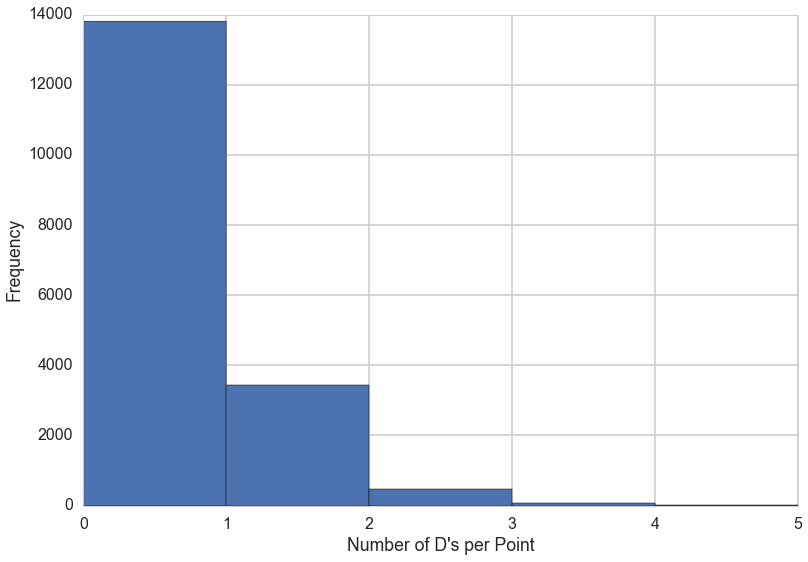

In [10]:
plt.hist(points.ds, bins=5)
plt.xlabel("Number of D's per Point")
plt.ylabel("Frequency")

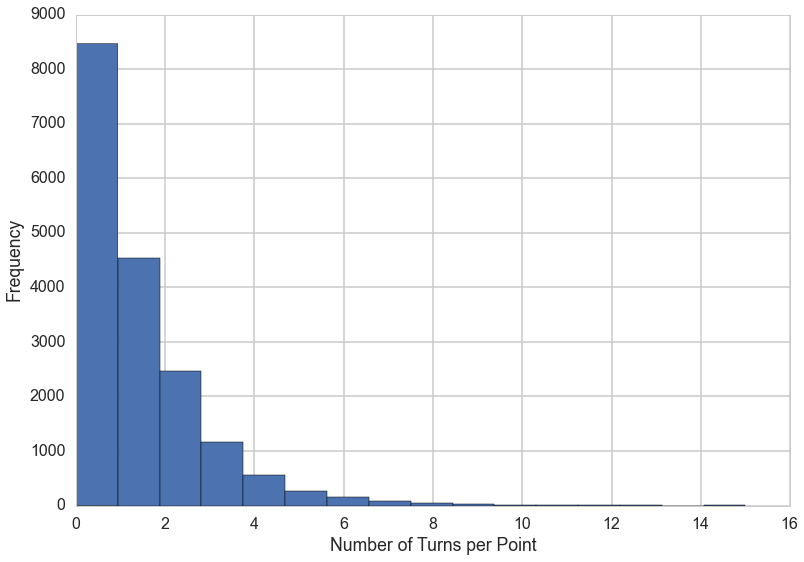

In [11]:
plt.hist(points.turns, bins=16)
plt.xlabel("Number of Turns per Point")
plt.ylabel("Frequency")

With this in mind, we start examining the relations of D's and Turns, remember that the points at the origin appear very frequently, and therefore are will be darker than those represented at the origin.  However, because there are so many points, these distinctions may not be the most clear.  We also look to see if there is a relationship between breaks and holds to the number of ds or turns, but from these graphs, there are no clear or even somewhat visible clusters.

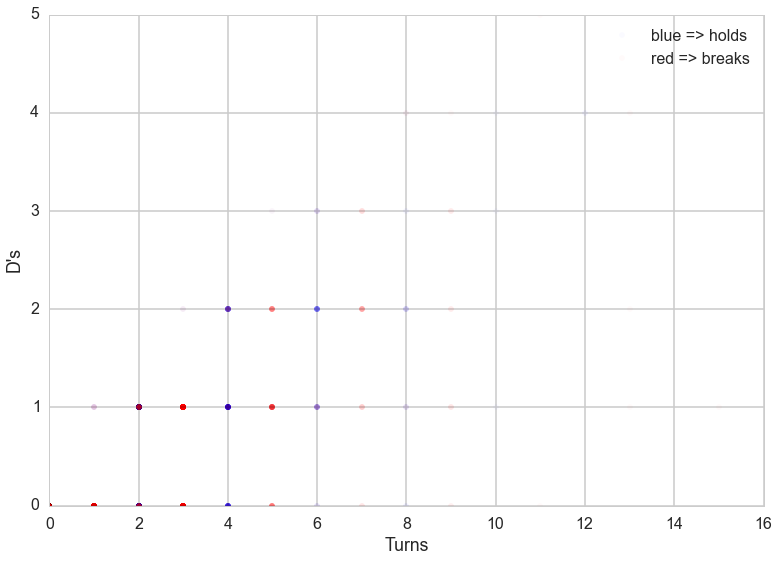

In [12]:
mask_hold = points.apply( lambda x :(x.offense == True and x.won == True), axis=1)
mask_break = points.apply( lambda x :(x.offense == True and x.won == False), axis=1)
plt.plot(points[mask_hold].turns, points[mask_hold].ds, '.', alpha=0.02, c='b', label="blue => holds")
plt.plot(points[mask_break].turns, points[mask_break].ds, '.', alpha=0.02, c='r', label="red => breaks")

plt.xlabel("Turns")
plt.ylabel("D's")
plt.legend()

We now do initial clustering of the data just in terms of turns and ds.  First we look to see if a Gaussian Mixture Model works.  We don't have super high expectations because looking at the hisogram distributions that we made above, they do not seem that evident.  So this may not be the best method of clustering.

In [13]:
Xall=points[['turns', 'ds']].values
from sklearn.mixture import GMM
n_clusters=2
clfgmm = GMM(n_components=n_clusters, covariance_type="tied")
clfgmm.fit(Xall)
print clfgmm
gmm_means=clfgmm.means_
gmm_covar=clfgmm.covars_
print gmm_means, gmm_covar

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 0.74518905  0.19676564]
 [ 4.70691983  1.00124591]] [[ 1.01157322  0.28019221]
 [ 0.28019221  0.23786601]]


In [14]:
from scipy import linalg

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell.set_clip_box(splot.bbox)
    ell1 = mpl.patches.Ellipse(mean, 1 * v[0] ** 0.5, 1 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell1.set_clip_box(splot.bbox)
    ell3 = mpl.patches.Ellipse(mean, 3 * v[0] ** 0.5, 3 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell3.set_clip_box(splot.bbox)
    #ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.add_artist(ell1)
    splot.add_artist(ell3)


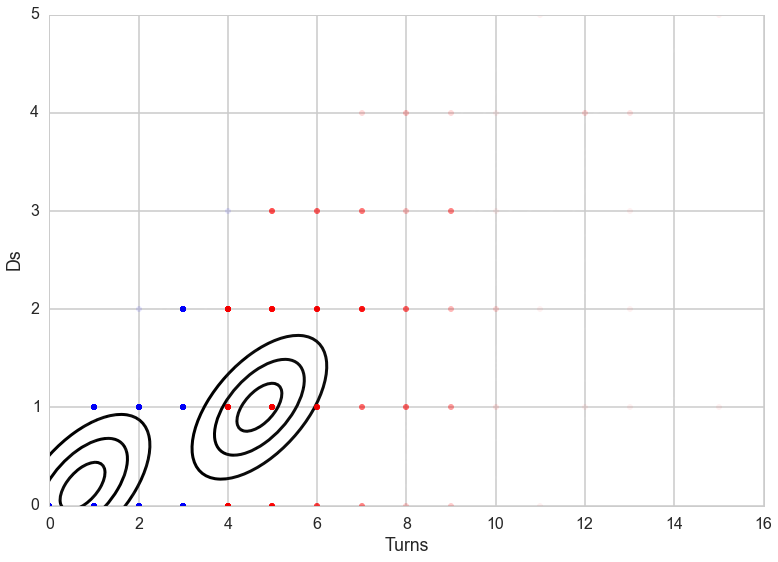

In [15]:
plt.figure()
ax=plt.gca()
plot_ellipse(ax, gmm_means[0], gmm_covar, 'k')
plot_ellipse(ax, gmm_means[1], gmm_covar, 'k')
gmm_labels=clfgmm.predict(Xall)

for k, col in zip(range(n_clusters), ['blue','red']):
    my_members = gmm_labels == k
    ax.plot(Xall[my_members, 0], Xall[my_members, 1], 'w',
            markerfacecolor=col, marker='.', alpha=0.05)
plt.xlabel("Turns")
plt.ylabel("Ds")

## K Means Clustering 

Like many sports, there is an emphasis on highlight plays during games. It can be difficult to determine when those plays might happen within a game. We performed some analysis on points based on the number of turns, d's, length of point, and number of throws. This analysis led to a 3-cluster model, where we can tell when points are very clean and quick, and when they are incredibly long, and have lots of turns. The middle cluster is one that might be the most interesting to examine for highlight plays. Our analysis indicates there are on average .5 d's per clean point, and therefore it is possible that these points are examples of high level, or very intense ultimate. For coaches or players trying to see good examples of the game played well, these points would be good to watch. Our initial analysis with just examining turns and d's (the most commonly talked about stat in ultimate) were not very illuminating. Adding the extra feature of time and throws per point allowed for more differentiation between points.

In [16]:
# try using k means
cluster_cols = points[["turns", "ds", "point_time"]]
model = KMeans(n_clusters=3).fit(cluster_cols.values)
points["cluster"] = model.labels_
points.groupby("cluster").count()

,date,ds,num_throws,offense,point_time,pull-ob,team,turns,won
cluster,,,,,,,,,
0,12499,12499,12499,12499,12499,12499,12389,12499,12499
1,4170,4170,4170,4170,4170,4170,4165,4170,4170
2,1138,1138,1138,1138,1138,1138,1136,1138,1138


Let us try with different parameters to see if we can shed some new light on the data.  We choose to add the number of throws per point because the fewer throws there are may indicate that there were some long throws by the offense.  Or the offense turned right away, and the defense could score fairly quickly.  Determining the right number of clusters to have can be difficult, we run an elbow test to see what number of clusters we might want to run.

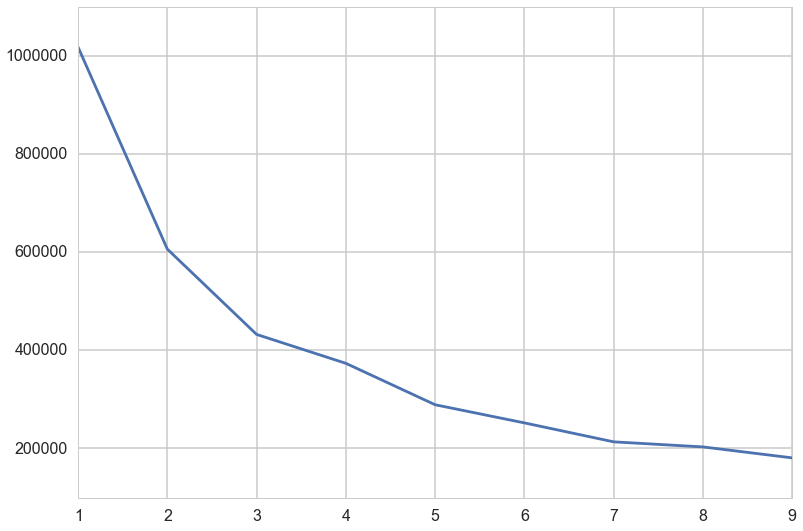

In [17]:
# try using k means
cluster_cols = points[["turns", "ds", "point_time", "num_throws"]]
model = KMeans(n_clusters=3).fit(cluster_cols.values)
points["cluster"] = model.labels_
points.groupby("cluster").count()

num_clusters = range(1, 10)
models = [KMeans(n_clusters = x) for x in num_clusters]
def score_from_model(model):
    predicted = model.fit_predict(cluster_cols.values)
    centroids = [model.cluster_centers_[x] for x in predicted]
    dist_sum = 0
    for i in range(0, len(predicted)):
        dist_sum += euclidean(cluster_cols.values[i], centroids[i])
    return dist_sum
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)

In [18]:
# defining clusters in plaintext
points.cluster[points.cluster == 2] = "battles"
points.cluster[points.cluster == 0] = "quick_points"
points.cluster[points.cluster == 1] = "clean_points"

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Game Play Analysis


It can be hard to determine what exactly these clusters mean, so we will look at a game to get a sense of what these clusters may mean.  

In [19]:
# summary statistics now with labels
points.groupby("cluster").mean()

,ds,num_throws,offense,point_time,pull-ob,turns,won
cluster,,,,,,,
battles,0.135340,5.382041,0.495896,39.119891,0.027277,0.512391,0.451400
clean_points,0.929249,17.577222,0.514236,305.307161,0.042278,3.929249,0.442623
quick_points,0.454739,11.081043,0.508057,136.398164,0.034360,1.926540,0.480569


Examining this reveals that there ds are much less frequent than turns.  And that the number of throws and length of point are the most clear distinguishing feature between the points.  It looks like cluster 1 are the points that are most likly to be exciting.  Around half of those points feature some form of ds, and often few turns.  This means that the points are likely to be more exciting, and they are of a length that indicates that the point was at the very least a hard fought battle.

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


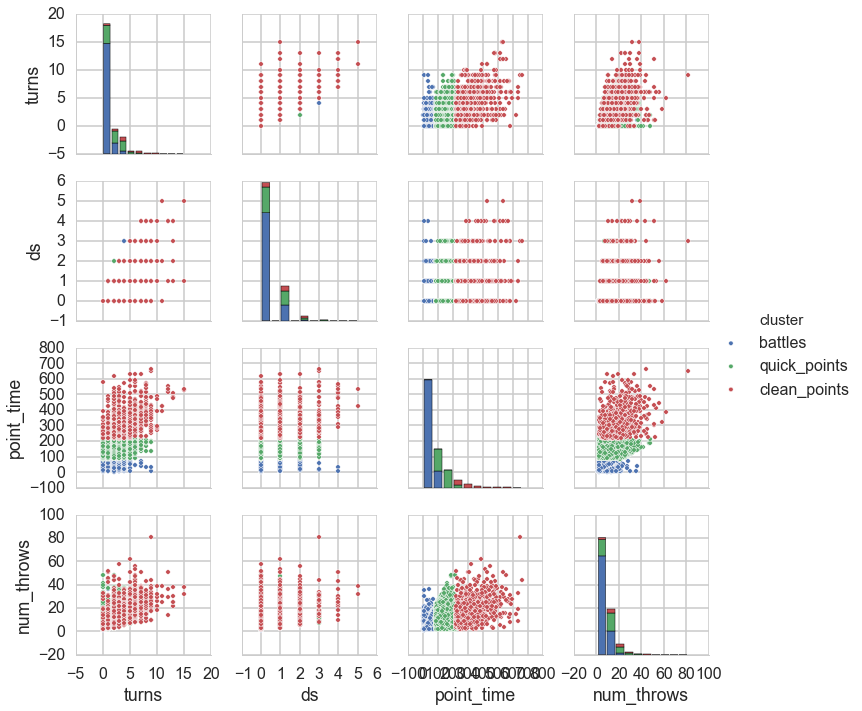

In [20]:
sns.pairplot(points, vars=["turns", "ds", "point_time", "num_throws"], hue="cluster")

We now look at a particular game between two teams to find some points that fall into the different clusters, and the differences between those points to get a sense of whether or not our clusters make sense.  Although this is a tedious process, we can profile games to get a sense of what to takeaway from the data.

In [21]:
cascades = points[points.team == "SeattleCascades"]
riptide = points[points.team == 'VancouverRiptide']
cascades_gp = cascades[cascades.date == "2015-04-18 19:34"]
riptide_gp = riptide[riptide.date == "2015-04-18 19:34"]

## Summary
This analysis has proved useful to those coaches or players that are trying to easily find points with certain characteristics in a game.  However, right now the analysis is not yet fine-grained enough to determine which points might contain highligh plays.  For that, we would need to go more into throw-by-throw analysis, which we have not gone into here.

# Twitter Analysis

Refer to twitter_scrape.ipynb in the same folder to see how Twitter player mentions correlate with player statistics.

--------
# Overall Conclusions

#### Exploratory Analysis
We first observed that the average length of a point is 83 seconds, which is relatively short. Next, we wanted to see if the length of a point varied between teams, when on offense or defense. We found that the best team has short offensive and defensive points that are each about 40 seconds. 

#### Player clustering
We used k-means clustering to differentiate between different player positions, and found five clusters - offensive and defensive cutters and handlers, and also defensive role players. We found that offensive cutters tended to be the best players: not only did they score the most, but they also were very good at getting assists. We also found that cutters tended to get more Defensive plays than handlers, and that handlers turned it over more than cutters.

#### Point clustering
Point clustering helped us identify points that are quick scores, clean scores, and battles. This analysis is useful to those coaches or players that are trying to easily find points with certain characteristics in a game. However, right now the analysis is not yet fine-grained enough to determine which points might contain highlight plays. For that, we would need to go more into throw-by-throw analysis, which we have not gone into here. 

#### Twitter Analysis
We used Twitter player mentions to determine a player’s popularity and to determine which characteristics make a player exceptional. We used Support Vector Machines and Decision Trees/Random Forests and found that the t # of assists and d’s help determine popularity.
